<hr>

#### Pedro Atencio Ortiz - 2020 (pedroatencio@itm.edu.co)


# Image segmentation using clustering

1. Segmentation in RGB color space
2. Segmentation in HSV color space

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv
from skimage import io

from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

import cv2

<hr>

# 1. Segmentation over RGB space


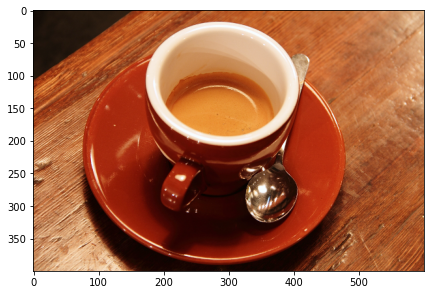

In [6]:
# Load the image

originImage = data.coffee() #from skimage
#I = io.imread('https://planetary.s3.amazonaws.com/web/assets/pictures/earth-blue-marble-mosaic-modis.jpg')#from URL

plt.figure(figsize=(7,7))
plt.imshow(originImg, cmap='gray')

In [7]:
originShape = originImage.shape # save the original image shape

flatImg=np.reshape(originImg, [-1, 3]) # transform original image from mxnx3 to (m*n)x3

# Estimate bandwidth for meanshift algorithm    
bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)    
print("Detected bandwidth: ", bandwidth)

# Apply MeanShift with the detected bandwidth
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(flatImg)

# retrieve labels after meanshift.   
labels=ms.labels_

# retrieve rgb colors after meanshift    
cluster_centers = ms.cluster_centers_    

# Finding and displaying the number of clusters    
labels_unique = np.unique(labels)    
n_clusters_ = len(labels_unique)    
print("number of estimated clusters : %d" % n_clusters_)    

Detected bandwidth:  29.4873916142719
number of estimated clusters : 10


In [8]:
# Reshape processed image from (m*n)x3 to mxnx3
segmentedImg = cluster_centers[np.reshape(labels, originShape[:2])]

# Save the result locally
cv2.imwrite('result_rgb.png',segmentedImg.astype(np.uint8))

True

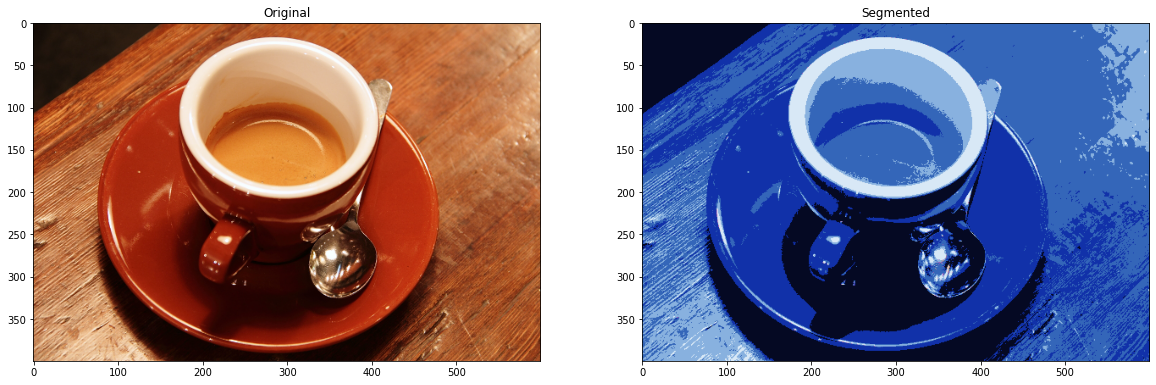

In [9]:
# Plot results

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Original")
plt.imshow(originImage, cmap='gray')

result = io.imread('result_rgb.png')

plt.subplot(122)
plt.title("Segmented")
plt.imshow(result, cmap='gray')

plt.show()


# 2. Segmentation over HSV space
---



In [10]:
from skimage.color import rgb2hsv, hsv2rgb
from sklearn.cluster import KMeans

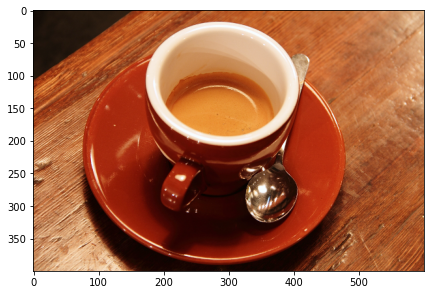

In [11]:
originImg = data.coffee() #from skimage

plt.figure(figsize=(7,7))
plt.imshow(originImg, cmap='gray')

In [12]:
originShape = originImage.shape

# Color transformation from rgb to hsv
hsvImg = rgb2hsv(originImg)

flatImg=np.reshape(hsvImg, [-1, 3])

bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)    
print("Detected bandwidth: ", bandwidth)

ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
ms.fit(flatImg)

labels=ms.labels_
cluster_centers = ms.cluster_centers_    

labels_unique = np.unique(labels)    
n_clusters_ = len(labels_unique)    
print("number of estimated clusters : %d" % n_clusters_) 

Detected bandwidth:  0.11723307075390417
number of estimated clusters : 29


In [13]:
segmentedImg = cluster_centers[np.reshape(labels, originShape[:2])]

# Color transformation from hsv to rgb
rgbImg = hsv2rgb(segmentedImg)*255

cv2.imwrite('result_hsv.png',rgbImg.astype(np.uint8))

True

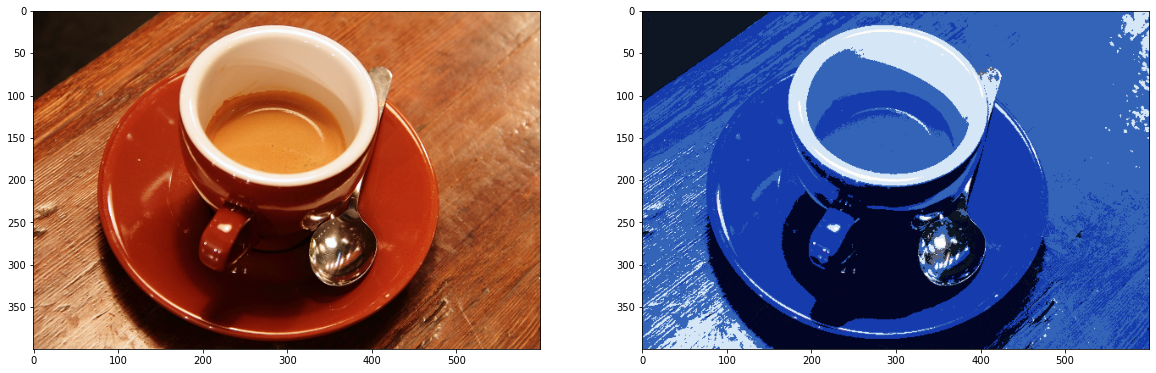

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(originImage, cmap='gray')

result = io.imread('result_hsv.png')

plt.subplot(122)
plt.imshow(result, cmap='gray')

plt.show()

<hr>

# Lets work!

1. Try different clustering techniques over this problem and make a visual evaluation.
2. Try to create a color map to better visualize the segmentation results (random colors). Hint: cluster_centers have the final colors or centroids. You can replace this values with random.